importing libraries

In [ ]:
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install seaborn

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas  as pd
import seaborn as sns

# Data Preprocessing 

Traing Image Preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 12188 files belonging to 8 classes.


Validation Image Preprocessing

In [36]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 908 files belonging to 8 classes.


In [37]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [38]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[209.70312  200.70312  231.70312 ]
   [204.52246  197.52246  230.52246 ]
   [208.51562  203.51562  233.51562 ]
   ...
   [209.34277  213.24805  246.34473 ]
   [212.11816  209.11816  240.11816 ]
   [209.65332  206.8252   241.43457 ]]

  [[207.10938  197.28125  230.76562 ]
   [214.18262  207.18262  241.01074 ]
   [215.0791   210.0791   240.80371 ]
   ...
   [218.80371  219.99707  251.19043 ]
   [212.18262  210.73535  241.73535 ]
   [213.11816  209.11816  242.11816 ]]

  [[213.6084   203.6084   237.6084  ]
   [210.47266  203.47266  237.47266 ]
   [207.04688  202.04688  234.04688 ]
   ...
   [212.49414  212.05664  241.36914 ]
   [208.94434  207.94434  239.94434 ]
   [208.64258  203.64258  235.64258 ]]

  ...

  [[211.38965  209.38965  246.38965 ]
   [209.23535  201.36035  240.29785 ]
   [209.62988  201.62988  240.62988 ]
   ...
   [213.90039  207.90039  243.90039 ]
   [209.35059  205.35059  238.35059 ]
   [209.35938  206.35938  237.35938 ]]

  [[207.46191  201.11816  239.2900

# Building Model

In [39]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [40]:
model = Sequential()

In [41]:
#Building convulation Layer

In [42]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
model.add(Dropout(0.25))#to avoid overfiiting

In [48]:
model.add(Flatten())

In [49]:
model.add(Dense(units=1500,activation='relu'))

In [50]:
model.add(Dropout(0.4))

In [51]:
#output layer
model.add(Dense(units=8,activation='softmax'))

# Compiling Model

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │        12,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [54]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.2669 - loss: 2.0339 - val_accuracy: 0.4670 - val_loss: 1.3809
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.5359 - loss: 1.2433 - val_accuracy: 0.6520 - val_loss: 1.0095
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 513s 1s/step - accuracy: 0.6267 - loss: 0.9810 - val_accuracy: 0.7059 - val_loss: 0.8337
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.6989 - loss: 0.8164 - val_accuracy: 0.7709 - val_loss: 0.6549
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.7701 - loss: 0.6510 - val_accuracy: 0.8106 - val_loss: 0.5327
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.8288 - loss: 0.5131 - val_accuracy: 0.8623 - val_loss: 0.4539
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 523s 1s/step - accuracy: 0.8655 - loss: 0.4065 - val_accuracy: 0.9328 - val_loss: 0.2721
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.9017 - loss: 0.3156 - val_accu

# MODEL EVALUATION

In [55]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

381/381 ━━━━━━━━━━━━━━━━━━━━ 136s 356ms/step - accuracy: 0.9886 - loss: 0.0841


In [56]:
print(train_loss,train_acc)

0.08193736523389816 0.9888414740562439


In [57]:
val_loss,val_acc = model.evaluate(validation_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.9572 - loss: 0.1672


In [58]:
print(val_loss,val_acc)

0.14491979777812958 0.965859055519104


# SAVING MODEL

In [59]:
model.save("trained_model.h5")

In [60]:
model.save("trained_model.keras")

In [61]:
training_history.history

{'accuracy': [0.35740071535110474,
  0.5683459043502808,
  0.6512143015861511,
  0.723990797996521,
  0.7897932529449463,
  0.8446832895278931,
  0.878322958946228,
  0.9083524942398071,
  0.929520845413208,
  0.9520019888877869],
 'loss': [1.7199877500534058,
  1.1528329849243164,
  0.9296563863754272,
  0.7615852355957031,
  0.6077173948287964,
  0.48184934258461,
  0.372480183839798,
  0.2921716272830963,
  0.23834805190563202,
  0.17568162083625793],
 'val_accuracy': [0.4669603407382965,
  0.6519823670387268,
  0.7059471607208252,
  0.7709251046180725,
  0.8105726838111877,
  0.8623347878456116,
  0.9328193664550781,
  0.9361233711242676,
  0.9614537358283997,
  0.965859055519104],
 'val_loss': [1.3808752298355103,
  1.0094603300094604,
  0.8337439298629761,
  0.6548875570297241,
  0.5327070951461792,
  0.4538573622703552,
  0.27207255363464355,
  0.2447713166475296,
  0.18226416409015656,
  0.14491979777812958]}

In [62]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [63]:
training_history.history['accuracy']

[0.35740071535110474,
 0.5683459043502808,
 0.6512143015861511,
 0.723990797996521,
 0.7897932529449463,
 0.8446832895278931,
 0.878322958946228,
 0.9083524942398071,
 0.929520845413208,
 0.9520019888877869]

In [64]:
training_history.history['val_accuracy']

[0.4669603407382965,
 0.6519823670387268,
 0.7059471607208252,
 0.7709251046180725,
 0.8105726838111877,
 0.8623347878456116,
 0.9328193664550781,
 0.9361233711242676,
 0.9614537358283997,
 0.965859055519104]

# ACCURACY VISUALIZATION

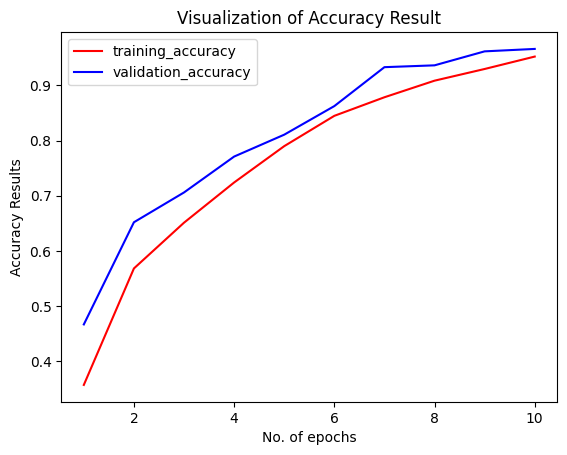

In [65]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation_accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Results")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# some other metrics for model evaluation

In [66]:
class_name = validation_set.class_names
class_name

['Acne',
 'Cellulitis Impetigo',
 'Eczema',
 'Healthy Skin',
 'Melanoma Nevi and Moles',
 'Vascular Tumors',
 'Warts Molluscum',
 'vitiligo']

In [67]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 908 files belonging to 8 classes.


In [68]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step


(array([[6.7714818e-02, 1.0202954e-04, 5.1121914e-04, ..., 2.7264241e-04,
         3.8849853e-03, 5.3279534e-02],
        [8.0739319e-01, 6.4107345e-04, 1.0962106e-03, ..., 3.1401205e-03,
         2.2219617e-02, 9.9499159e-02],
        [9.4429511e-01, 8.2277730e-03, 5.4129222e-03, ..., 1.1208814e-03,
         1.6087443e-02, 9.3765268e-03],
        ...,
        [9.1909205e-05, 2.6933908e-09, 7.4893680e-10, ..., 3.7055747e-07,
         2.5496644e-07, 9.9984813e-01],
        [5.4000981e-08, 2.8052527e-10, 2.9413211e-10, ..., 1.4596485e-11,
         8.3537954e-11, 9.9946874e-01],
        [7.0085036e-09, 1.3869507e-10, 5.6176785e-11, ..., 1.6020248e-11,
         7.0438891e-11, 9.9999666e-01]], dtype=float32),
 (908, 8))

In [69]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [70]:
predicted_categories

<tf.Tensor: shape=(908,), dtype=int64, numpy=
array([3, 0, 0, 6, 1, 0, 0, 0, 2, 0, 0, 2, 6, 0, 6, 0, 4, 6, 2, 6, 0, 0,
       0, 2, 0, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0,
       3, 0, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
     

In [71]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(908, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [72]:
Y_true = tf.argmax(true_categories,axis=1)

In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Shruti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                         precision    recall  f1-score   support

                   Acne       0.96      0.56      0.71        48
    Cellulitis Impetigo       0.96      1.00      0.98        25
                 Eczema       0.68      1.00      0.81        26
           Healthy Skin       0.97      1.00      0.98       116
Melanoma Nevi and Moles       0.99      0.98      0.99       198
        Vascular Tumors       1.00      0.99      1.00       325
        Warts Molluscum       0.93      0.98      0.95        90
               vitiligo       0.94      0.99      0.96        80

               accuracy                           0.97       908
              macro avg       0.93      0.94      0.92       908
           weighted avg       0.97      0.97      0.96       908



In [76]:
cm = confusion_matrix(Y_true,predicted_categories)
cm,cm.shape

(array([[ 27,   1,   4,   4,   1,   0,   6,   5],
        [  0,  25,   0,   0,   0,   0,   0,   0],
        [  0,   0,  26,   0,   0,   0,   0,   0],
        [  0,   0,   0, 116,   0,   0,   0,   0],
        [  0,   0,   3,   0, 194,   0,   1,   0],
        [  0,   0,   3,   0,   0, 322,   0,   0],
        [  0,   0,   2,   0,   0,   0,  88,   0],
        [  1,   0,   0,   0,   0,   0,   0,  79]]),
 (8, 8))

confusion matrix visualization

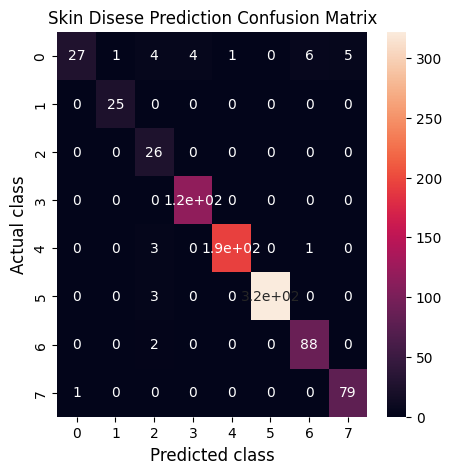

In [80]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,annot_kws = {'size':10})
plt.xlabel("Predicted class",fontsize=12)
plt.ylabel("Actual class",fontsize=12)
plt.title("Skin Disese Prediction Confusion Matrix",fontsize=12)
plt.show()